Dataset cargado: 1797 muestras, 64 dimensiones originales.
Ejecutando t-SNE (Perplexity: 30)... Esto puede tardar unos segundos.


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/tmp/ipython-input-3700115233.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95]) # Ajusta el layout para dar espacio al título general


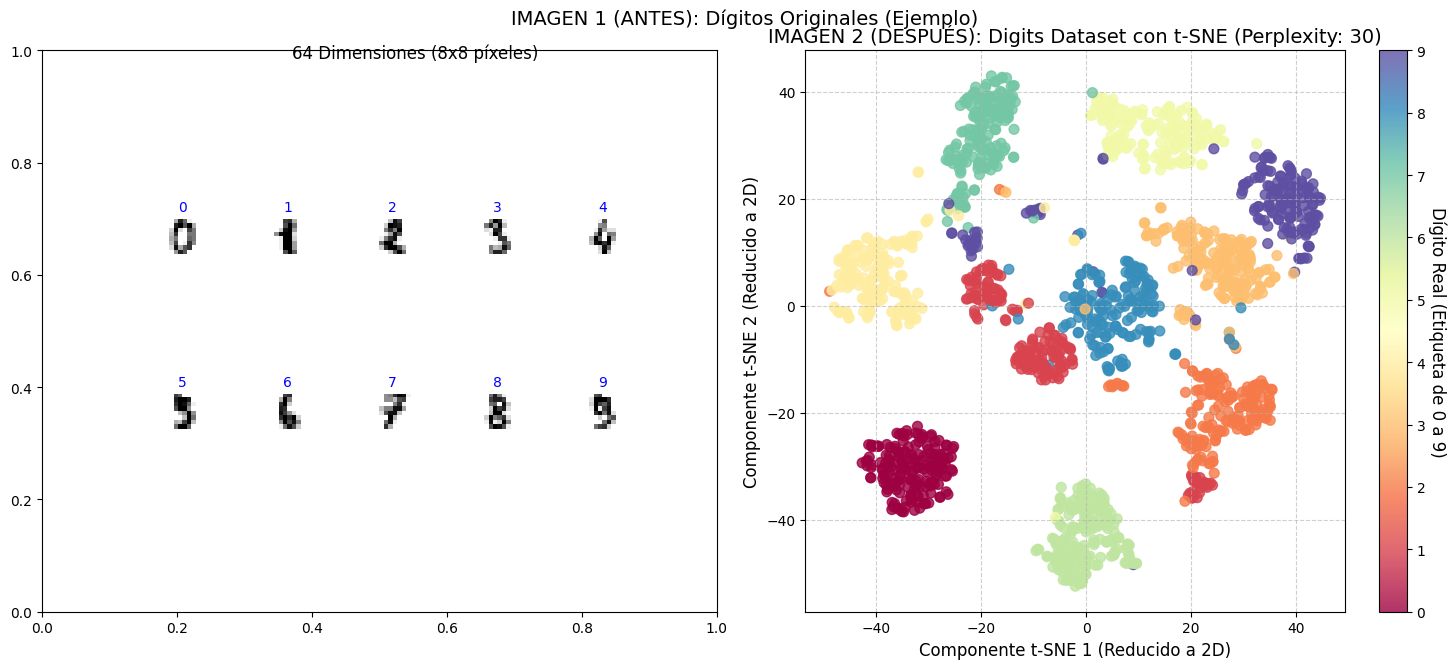

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# ----------------------------------------------------------------------
#  Carga y Preparación del Dataset Digits
# ----------------------------------------------------------------------

digits = load_digits()
X = digits.data    # Las características (64 dimensiones, imágenes 8x8 aplanadas)
y = digits.target  # Las etiquetas reales (0 a 9)
images = digits.images # Las imágenes originales (8x8)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Dataset cargado: {X_scaled.shape[0]} muestras, {X_scaled.shape[1]} dimensiones originales.")

# ----------------------------------------------------------------------
#  Aplicación del Algoritmo t-SNE
# ----------------------------------------------------------------------

perplexity_val = 30
n_components_val = 2

tsne = TSNE(
    n_components=n_components_val,
    perplexity=perplexity_val,
    n_iter=1000,
    random_state=42,
    learning_rate='auto',
    init='pca'
)

print(f"Ejecutando t-SNE (Perplexity: {perplexity_val})... Esto puede tardar unos segundos.")
X_tsne = tsne.fit_transform(X_scaled)

# ----------------------------------------------------------------------
#  Visualización "ANTES" y "DESPUÉS"
# ----------------------------------------------------------------------

plt.figure(figsize=(15, 7)) # Aumentamos el tamaño para dos subplots grandes
plt.subplot(1, 2, 1)
# Mostraremos los primeros 10 dígitos (uno de cada clase)
for i in range(10):
    # Encontramos la primera ocurrencia de cada dígito
    idx = np.where(y == i)[0][0]
    # Añadimos la imagen como un subplot más pequeño dentro de este panel
    ax_img = plt.axes([0.1 + (i % 5) * 0.07, 0.6 - (i // 5) * 0.25, 0.05, 0.05]) # [left, bottom, width, height]
    ax_img.imshow(images[idx], cmap=plt.cm.gray_r, interpolation='nearest')
    ax_img.set_title(str(i), fontsize=10, color='blue')
    ax_img.axis('off')

plt.text(0.5, 0.95, 'IMAGEN 1 (ANTES): Dígitos Originales (Ejemplo)',
         horizontalalignment='center', verticalalignment='top',
         transform=plt.gcf().transFigure, fontsize=14)
# Ajuste manual para el título del subplot
plt.text(0.28, 0.9, '64 Dimensiones (8x8 píxeles)',
         horizontalalignment='center', verticalalignment='top',
         transform=plt.gcf().transFigure, fontsize=12)


# --- IMAGEN 2 (DESPUÉS): Visualización 2D con t-SNE ---
plt.subplot(1, 2, 2)

scatter = plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=y,  # Color basado en la etiqueta real (el dígito que es)
    cmap='Spectral',
    s=50,
    alpha=0.8
)

cbar = plt.colorbar(scatter, ticks=np.arange(10))
cbar.set_label('Dígito Real (Etiqueta de 0 a 9)', rotation=270, labelpad=15, fontsize=12)


plt.title(f'IMAGEN 2 (DESPUÉS): Digits Dataset con t-SNE (Perplexity: {perplexity_val})', fontsize=14)
plt.xlabel('Componente t-SNE 1 (Reducido a 2D)', fontsize=12)
plt.ylabel('Componente t-SNE 2 (Reducido a 2D)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()